In [111]:
import pandas as pd
import numpy as np
import seaborn as sns

In [112]:
df=pd.read_csv('/content/drive/MyDrive/IBM/airports.csv')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67312 entries, 0 to 67311
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 67312 non-null  int64  
 1   ident              67311 non-null  object 
 2   type               67312 non-null  object 
 3   name               67312 non-null  object 
 4   latitude_deg       67312 non-null  float64
 5   longitude_deg      67312 non-null  float64
 6   elevation_ft       54335 non-null  float64
 7   continent          34320 non-null  object 
 8   iso_country        67055 non-null  object 
 9   iso_region         67312 non-null  object 
 10  municipality       61781 non-null  object 
 11  scheduled_service  67312 non-null  object 
 12  gps_code           42618 non-null  object 
 13  iata_code          9244 non-null   object 
 14  local_code         32055 non-null  object 
 15  home_link          3300 non-null   object 
 16  wikipedia_link     103

In [114]:
df.isnull().sum()

id                       0
ident                    1
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft         12977
continent            32992
iso_country            257
iso_region               0
municipality          5531
scheduled_service        0
gps_code             24694
iata_code            58068
local_code           35257
home_link            64012
wikipedia_link       56942
keywords             54945
dtype: int64

In [115]:
rows=df.shape[0]
cols=df.shape[1]
print(rows)
print(cols)

67312
18


In [116]:
df1=df.drop(['home_link','wikipedia_link','keywords','iata_code'],axis=1)

In [117]:
print(df1.shape[0])

67312


In [118]:
print(df1.shape[1])

14


In [119]:
df1.isnull().sum()

id                       0
ident                    1
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft         12977
continent            32992
iso_country            257
iso_region               0
municipality          5531
scheduled_service        0
gps_code             24694
local_code           35257
dtype: int64

In [121]:
mean=df1['elevation_ft'].mean()


In [122]:
df1['elevation_ft'].fillna(mean)

0          11.0
1        3435.0
2         450.0
3         820.0
4         237.0
          ...  
67307      40.0
67308      11.0
67309     690.0
67310       4.0
67311     338.0
Name: elevation_ft, Length: 67312, dtype: float64

In [123]:
df1['elevation_ft']=df1['elevation_ft'].fillna(mean)

In [124]:
df1.isnull().sum()

id                       0
ident                    1
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft             0
continent            32992
iso_country            257
iso_region               0
municipality          5531
scheduled_service        0
gps_code             24694
local_code           35257
dtype: int64

In [128]:
len(df1['municipality'].unique())

30903

In [129]:
df1['continent']=df1['continent'].fillna('unknown')

In [130]:
df1.isnull().sum()

id                       0
ident                    1
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft             0
continent                0
iso_country            257
iso_region               0
municipality          5531
scheduled_service        0
gps_code             24694
local_code           35257
dtype: int64

In [132]:
df1['municipality']=df1['municipality'].fillna('unknown')

In [138]:
df1.isnull().sum()

id                       0
ident                    1
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft             0
continent                0
iso_country              0
iso_region               0
municipality             0
scheduled_service        0
gps_code             24694
local_code           35257
dtype: int64

In [136]:
df1[df1['iso_country'].isnull()]['iso_region']

23778     NA-KU
23779     NA-KA
23780     NA-KA
23781     NA-OH
23782     NA-ER
          ...  
42181     NA-KW
42182     NA-ER
42183     NA-ER
42184     NA-HA
42185    NA-U-A
Name: iso_region, Length: 257, dtype: object

In [137]:
df1['iso_country']=df1['iso_country'].fillna('unknown')

In [139]:
df1['gps_code']=df1['gps_code'].fillna('unknown')
df1['local_code']=df1['local_code'].fillna('unknown')

In [140]:
df1.isnull().sum()

id                   0
ident                1
type                 0
name                 0
latitude_deg         0
longitude_deg        0
elevation_ft         0
continent            0
iso_country          0
iso_region           0
municipality         0
scheduled_service    0
gps_code             0
local_code           0
dtype: int64

In [141]:
df1=df1.drop(['id'],axis=1)

In [142]:
df1=df1.dropna()

In [143]:
df1.isnull().sum()

ident                0
type                 0
name                 0
latitude_deg         0
longitude_deg        0
elevation_ft         0
continent            0
iso_country          0
iso_region           0
municipality         0
scheduled_service    0
gps_code             0
local_code           0
dtype: int64

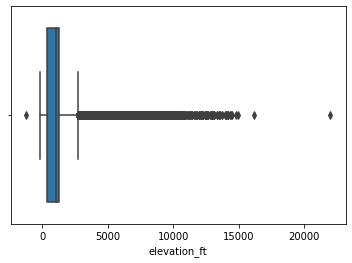

In [144]:
sns.boxplot(data=df1,x='elevation_ft')

In [145]:
df1[df1['elevation_ft']>20000]

,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,local_code
27021,IN-0001,heliport,Siachen Glacier AFS Airport,35.5,77.0,22000.0,AS,IN,IN-JK,unknown,no,unknown,unknown


In [147]:
df1=df1.drop(27021)

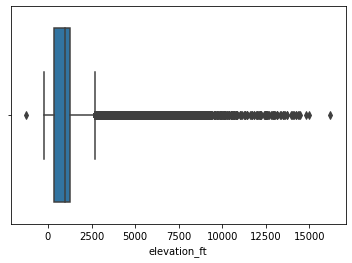

In [148]:
sns.boxplot(data=df1,x='elevation_ft')

In [149]:
df1[df1['elevation_ft']>15000]

,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,local_code
27023,IN-0003,small_airport,Daulat Beg Oldi Advanced Landing Ground,35.396467,77.928965,16200.0,AS,IN,IN-JK,unknown,no,unknown,unknown


In [150]:
df1=df1.drop(27023)

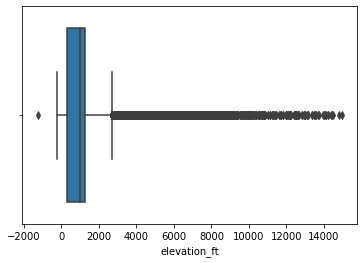

In [151]:
sns.boxplot(data=df1,x='elevation_ft')

In [152]:
df1.head()

,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,local_code
0,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,unknown,US,US-PA,Bensalem,no,00A,00A
1,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,unknown,US,US-KS,Leoti,no,00AA,00AA
2,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,unknown,US,US-AK,Anchor Point,no,00AK,00AK
3,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,unknown,US,US-AL,Harvest,no,00AL,00AL
4,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,unknown,US,US-AR,Newport,no,unknown,unknown


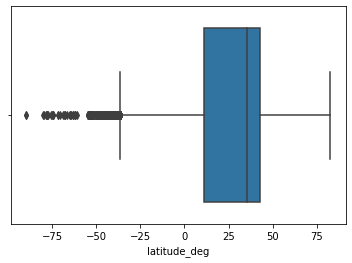

In [153]:
sns.boxplot(data=df1,x='latitude_deg')

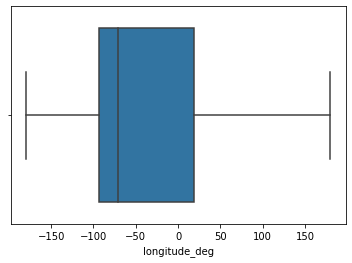

In [154]:
sns.boxplot(data=df1,x='longitude_deg')

In [155]:
df1[df1['latitude_deg']<-85]

,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,local_code
11189,AQ-0005,medium_airport,Jack F. Paulus Skiway,-89.989444,-1.0,9300.0,AN,AQ,AQ-U-A,Amundsen-Scott South Pole Station,no,NZSP,unknown
43638,NZSP,medium_airport,South Pole Station Airport,-90.000000,0.0,9300.0,AN,AQ,AQ-U-A,Amundsen-Scott South Pole Station,no,NZSP,unknown


In [156]:
df1=df1.drop(11189)
df1=df1.drop(43638)

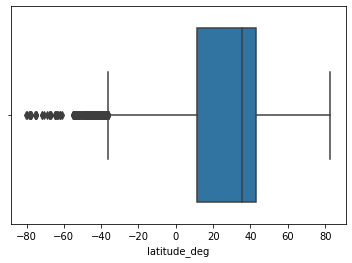

In [157]:
sns.boxplot(data=df1,x='latitude_deg')

In [160]:
df1.to_csv('/content/drive/MyDrive/IBM/Airports1.csv')

In [159]:
pwd

'/content'

In [163]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67307 entries, 0 to 67311
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ident              67307 non-null  object 
 1   type               67307 non-null  object 
 2   name               67307 non-null  object 
 3   latitude_deg       67307 non-null  float64
 4   longitude_deg      67307 non-null  float64
 5   elevation_ft       67307 non-null  float64
 6   continent          67307 non-null  object 
 7   iso_country        67307 non-null  object 
 8   iso_region         67307 non-null  object 
 9   municipality       67307 non-null  object 
 10  scheduled_service  67307 non-null  object 
 11  gps_code           67307 non-null  object 
 12  local_code         67307 non-null  object 
dtypes: float64(3), object(10)
memory usage: 7.2+ MB


In [183]:
df=pd.read_csv('/content/drive/MyDrive/IBM/regions.csv')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3963 non-null   int64 
 1   code            3963 non-null   object
 2   local_code      3957 non-null   object
 3   name            3963 non-null   object
 4   continent       3544 non-null   object
 5   iso_country     3948 non-null   object
 6   wikipedia_link  3712 non-null   object
 7   keywords        460 non-null    object
dtypes: int64(1), object(7)
memory usage: 247.8+ KB


In [185]:
df.isnull().sum()

id                   0
code                 0
local_code           6
name                 0
continent          419
iso_country         15
wikipedia_link     251
keywords          3503
dtype: int64

In [186]:
df1=df.drop(['wikipedia_link','keywords'],axis=1)

In [187]:
df1.head()

,id,code,local_code,name,continent,iso_country
0,302811,AD-02,02,Canillo Parish,EU,AD
1,302812,AD-03,03,Encamp Parish,EU,AD
2,302813,AD-04,04,La Massana Parish,EU,AD
3,302814,AD-05,05,Ordino Parish,EU,AD
4,302815,AD-06,06,Sant Julià de Lòria Parish,EU,AD


In [188]:
df1['continent']=df1['continent'].fillna('unknown')
df1['iso_country']=df1['iso_country'].fillna('unknown')
df1['local_code']=df1['local_code'].fillna('unknown')

In [191]:
df1.isnull().sum()

code           0
local_code     0
name           0
continent      0
iso_country    0
dtype: int64

In [190]:
df1=df1.drop(['id'],axis=1)

In [202]:
df1.to_csv('/content/drive/MyDrive/IBM/Regions1.csv')

In [205]:
df=pd.read_csv('/content/drive/MyDrive/IBM/countries.csv')

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              247 non-null    int64 
 1   code            246 non-null    object
 2   name            247 non-null    object
 3   continent       206 non-null    object
 4   wikipedia_link  247 non-null    object
 5   keywords        92 non-null     object
dtypes: int64(1), object(5)
memory usage: 11.7+ KB


In [207]:
df.isnull().sum()

id                  0
code                1
name                0
continent          41
wikipedia_link      0
keywords          155
dtype: int64

In [208]:
df1=df.drop(['id','wikipedia_link','keywords'],axis=1)

In [209]:
df1['continent']=df1['continent'].fillna('unknown')

In [210]:
df1.isnull().sum()

code         1
name         0
continent    0
dtype: int64

In [211]:
df1[df1['code'].isnull()]

,code,name,continent
156,NaN,Namibia,AF


In [212]:
df1['code']=df1['code'].fillna('NM')

In [213]:
df1.isnull().sum()

code         0
name         0
continent    0
dtype: int64

In [214]:
df1.to_csv('/content/drive/MyDrive/IBM/Countries1.csv')

In [215]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   code       247 non-null    object
 1   name       247 non-null    object
 2   continent  247 non-null    object
dtypes: object(3)
memory usage: 5.9+ KB
